# 环境搭建

In [ ]:
pip install transformers

In [ ]:
pip install snownlp

In [ ]:
import os
 
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Finbert/2.0/notebook


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Finbert/2.0/notebook/"
os.chdir(path)

In [ ]:
import sys
sys.path.append('..')
from finbert.finbert import Finbert
from finbert.spider import Spider_For_GUBA
from snownlp import sentiment
from snownlp import SnowNLP

import pandas as pd
import numpy as np
import re
import time
# pd.set_option('display.max_rows', None) # 显示全部行
# pd.set_option('display.max_columns', None) # 显示全部列

# 初始数据集获取

In [ ]:
sfgb = Spider_For_GUBA()

In [ ]:
data = sfgb.require_reviews(8,48) ### 特意放宽页码，保证核心数据的完整性

page 8 : completed
page 9 : completed
page 10 : completed
page 11 : completed
page 12 : completed
page 13 : completed
page 14 : completed
page 15 : completed
page 16 : completed
page 17 : completed
page 18 : completed
page 19 : completed
page 20 : completed
page 21 : completed
page 22 : completed
page 23 : completed
page 24 : completed
page 25 : completed
page 26 : completed
page 27 : completed
page 28 : completed
page 29 : completed
page 30 : completed
page 31 : completed
page 32 : completed
page 33 : completed
page 34 : completed
page 35 : completed
page 36 : completed
page 37 : completed
page 38 : completed
page 39 : completed
page 40 : completed
page 41 : completed
page 42 : completed
page 43 : completed
page 44 : completed
page 45 : completed
page 46 : completed
page 47 : completed
page 48 : completed


In [ ]:
data.to_csv('../data/corpus/raw_corpus.csv',encoding='utf-8',index=False)

# 特征工程

In [ ]:
raw_data = pd.read_csv('../data/corpus/raw_corpus.csv')

In [ ]:
raw_data.head()

,text,date
0,大忽悠，大,2020-11-11 19:29:24
1,你有狐狸的技术你来分析试试看有粉丝吗,2020-11-09 20:45:51
2,狐狸我爱你,2020-11-09 14:34:58
3,上周跟狐狸老师满仓干，哈哈，,2020-11-09 13:47:20
4,老师，今天涨这么好，后面会回调么,2020-11-09 12:07:09


## 类型检查

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229904 entries, 0 to 229903
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    229904 non-null  object
 1   date    229904 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
## 对date字段进行格式转化

In [ ]:
raw_data['date'] = raw_data.date.str.slice(0,10)  

In [ ]:
raw_data.head()

,text,date
0,大忽悠，大,2020-11-11
1,你有狐狸的技术你来分析试试看有粉丝吗,2020-11-09
2,狐狸我爱你,2020-11-09
3,上周跟狐狸老师满仓干，哈哈，,2020-11-09
4,老师，今天涨这么好，后面会回调么,2020-11-09


In [ ]:
raw_data['date'] = raw_data.date.apply(lambda x : re.sub('-', '', x))

In [ ]:
raw_data.head()

,text,date
0,大忽悠，大,20201111
1,你有狐狸的技术你来分析试试看有粉丝吗,20201109
2,狐狸我爱你,20201109
3,上周跟狐狸老师满仓干，哈哈，,20201109
4,老师，今天涨这么好，后面会回调么,20201109


In [ ]:
## 对text字段进行格式转化

In [ ]:
raw_data.text  

0                                                    大忽悠，大 
1                                       你有狐狸的技术你来分析试试看有粉丝吗 
2                                                    狐狸我爱你 
3                                           上周跟狐狸老师满仓干，哈哈， 
4                                         老师，今天涨这么好，后面会回调么 
                                ...                        
229899                             不是多就是空呗  看空的理论依据 数据支撑呢？ 
229900                                               你是个傻子 
229901    不论看多看空，像你这样天天唯我独尊幸灾乐祸的样子，好像只有人人都赔才能映衬你的正确，对付这种...
229902    这种提醒有意义吗 谁都可以提醒你小心跌的风险 中国股市散户只能做多 风险之一就是下跌风险 每...
229903                                       他又没讲对过，看个笑话吧。 
Name: text, Length: 229904, dtype: object

In [ ]:
raw_data['text'] = raw_data.text.apply(lambda x : re.sub('\[[\u4e00-\u9fa5]*\]', "", x)) ## 去表情

In [ ]:
raw_data['text'] = raw_data.text.str.strip() ## 去前后空格

In [ ]:
raw_data = raw_data[raw_data['text'] != ''].reset_index().drop('index',axis=1) ## 去除空行字符串

In [ ]:
raw_data ##格式转换成功

,text,date
0,大忽悠，大,20201111
1,你有狐狸的技术你来分析试试看有粉丝吗,20201109
2,狐狸我爱你,20201109
3,上周跟狐狸老师满仓干，哈哈，,20201109
4,老师，今天涨这么好，后面会回调么,20201109
...,...,...
216001,不是多就是空呗 看空的理论依据 数据支撑呢？,20200505
216002,你是个傻子,20200505
216003,不论看多看空，像你这样天天唯我独尊幸灾乐祸的样子，好像只有人人都赔才能映衬你的正确，对付这种...,20200505
216004,这种提醒有意义吗 谁都可以提醒你小心跌的风险 中国股市散户只能做多 风险之一就是下跌风险 每...,20200506


## 描述性统计

In [ ]:
raw_data.describe(include='all').T  # 显然text存在重复与冗余/异常

,count,unique,top,freq
text,216006,186584,支持,898
date,216006,336,20200902,3168


## 探索性分析

<AxesSubplot:>

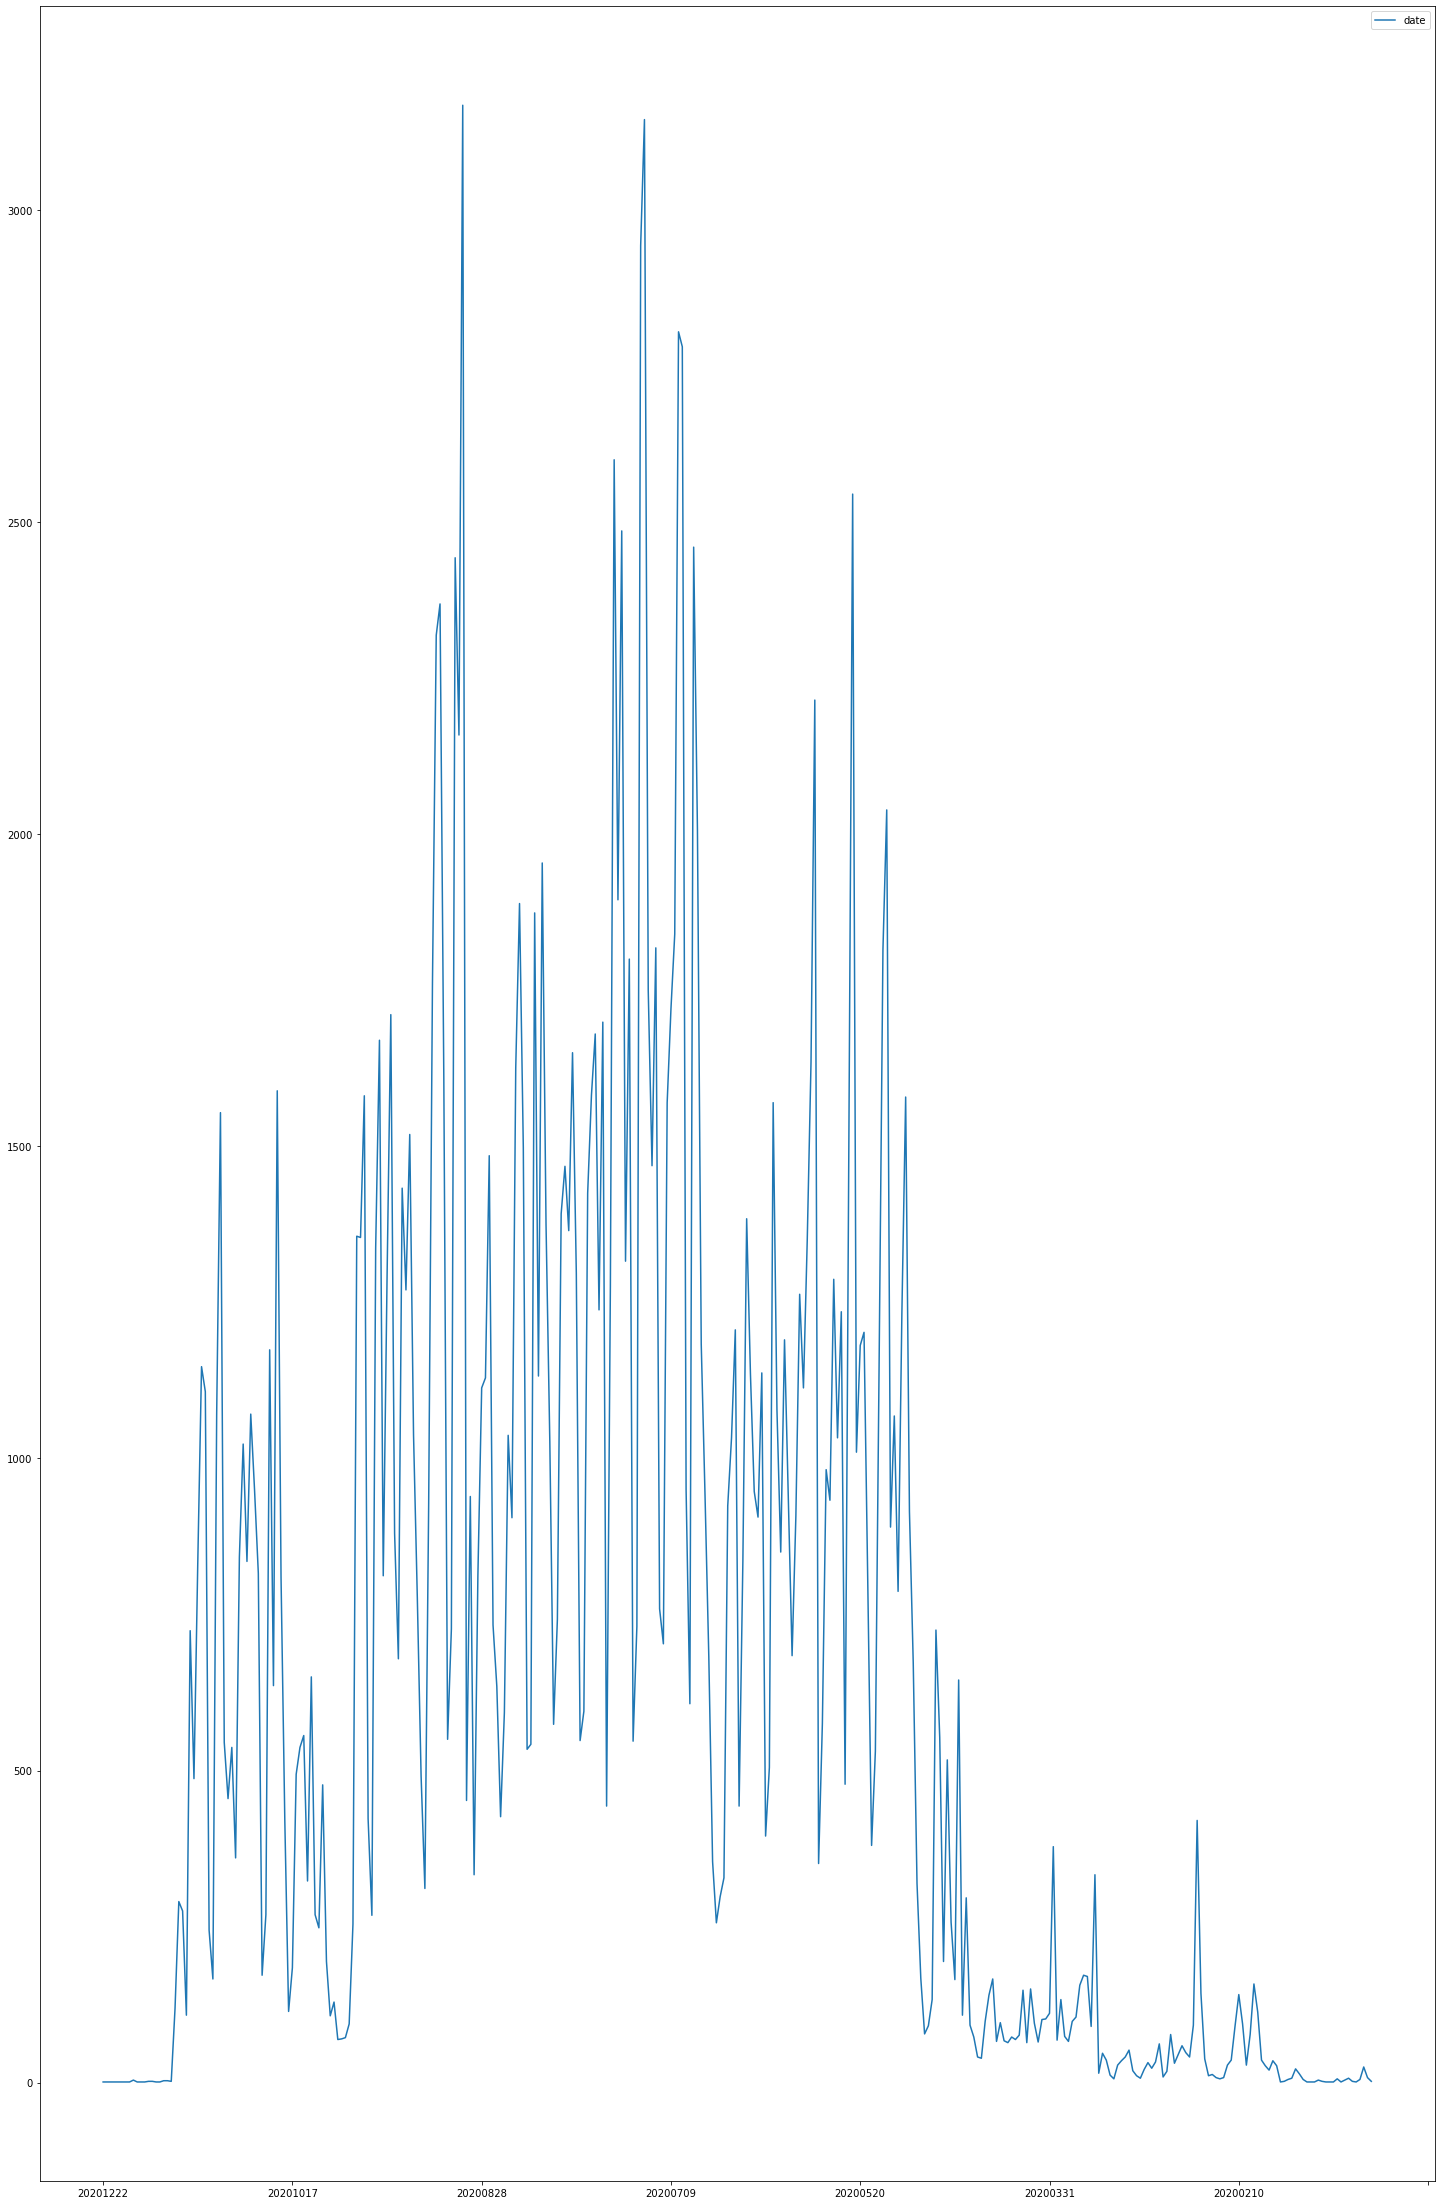

In [ ]:
a = pd.DataFrame(raw_data.date.value_counts().sort_index(ascending=False))
a.plot(figsize=(25,40)) # 可见核心数据集-6~9月份的评论提取完整

In [ ]:
b = pd.DataFrame(raw_data.text.value_counts().sort_values(ascending=False))
b.head() ## 发现存在诸多表情  而这表情大多都是针对作者，而非股票，因此是冗余信息需剔除

,text
支持,898
图片评论,854
谢谢,728
抱歉！内容已删除,724
老师早上好,488


In [ ]:
b.to_csv('../data/corpus/temp.csv',encoding='utf-8') ## 保存成csv，更细致观测频率高的评论是哪些

## 异常值处理

In [ ]:
meanless_index = b[(b.text>29).values].index  ### 频数降序，碰到第一个含正常股票情绪的词，用它的频数来截断 因为前面大多是打招呼

In [ ]:
meanless_index

Index(['支持', '图片评论', '谢谢', '抱歉！内容已删除', '老师早上好', '谢谢老师', '老师早', '早上好', '支持狐狸',
       '666',
       ...
       'e好！', '蠢货，滚', '优秀', '人才', '感谢！', '牛人', '谢谢狐狸！', '熊哥早', 'SB', '额'],
      dtype='object', length=141)

In [ ]:
(raw_data.text.apply(lambda x:x not in meanless_index)).sum()

201000

In [ ]:
raw_data = raw_data[raw_data.text.apply(lambda x:x not in meanless_index)]
raw_data  ### 虽然还留有一部分干扰评论，但都是频数较低的，到后面细分成天数汇总情感时，影响并不大

,text,date
0,大忽悠，大,20201111
1,你有狐狸的技术你来分析试试看有粉丝吗,20201109
2,狐狸我爱你,20201109
3,上周跟狐狸老师满仓干，哈哈，,20201109
4,老师，今天涨这么好，后面会回调么,20201109
...,...,...
216001,不是多就是空呗 看空的理论依据 数据支撑呢？,20200505
216002,你是个傻子,20200505
216003,不论看多看空，像你这样天天唯我独尊幸灾乐祸的样子，好像只有人人都赔才能映衬你的正确，对付这种...,20200505
216004,这种提醒有意义吗 谁都可以提醒你小心跌的风险 中国股市散户只能做多 风险之一就是下跌风险 每...,20200506


In [ ]:
raw_data.to_csv('../data/corpus/raw_corpus_after.csv',encoding='utf-8',index=False)

## 数据集划分

In [ ]:
raw_data_after = pd.read_csv('../data/corpus/raw_corpus_after.csv')

In [ ]:
raw_data_after['date'] = raw_data_after.date.astype('object')

In [ ]:
raw_data_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201000 entries, 0 to 200999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    201000 non-null  object
 1   date    201000 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [ ]:
'20201127' < '2020926' ## 不能直接比较

True

In [ ]:
train_corpus_index = raw_data_after.date.apply(lambda x: time.strptime(str(x), "%Y%m%d")> time.strptime('20200531', "%Y%m%d") 
                          and time.strptime(str(x) , "%Y%m%d") < time.strptime('20200901', "%Y%m%d"))
train_corpus = raw_data_after[train_corpus_index]
train_corpus

,text,date
509,静心持股：9月7日将擂响战鼓发起攻击直至9月28日止并一举收复沪3495点至3556点区间战...,20200830
512,渔歌老师晚上好！请问大盘是不是提前调整了啊？8月还会有新高吗？买了证券股哈投股份被套住了，看...,20200819
513,还是渔歌的有味道呀,20200817
514,股指夏季上升与反弹行情预计将延续至9月1日附近，参考沪指高度值在3495点上下，9月2日起将...,20200816
515,创业板目前怎么看,20200814
...,...,...
190233,大师级！,20200706
196100,起这个名字是 梦入神机 这位笔坛大神的忠粉，还是为了蹭他热度？,20200714
196197,听神机的明天清仓,20200628
196634,当然好了，我很好！捂股丰登呢,20200601


In [ ]:
train_corpus.date.value_counts().sort_index()  ## 成功提取

20200601    2096
20200602    1531
20200603    1227
20200604    1063
20200605    1184
            ... 
20200827    1055
20200828    1031
20200829     779
20200830     325
20200831     867
Name: date, Length: 92, dtype: int64

In [ ]:
val_corpus_index = raw_data_after.date.apply(lambda x: time.strptime(str(x), "%Y%m%d")> time.strptime('20200831', "%Y%m%d") 
                          and time.strptime(str(x) , "%Y%m%d") < time.strptime('20201001', "%Y%m%d"))
val_corpus = raw_data_after[val_corpus_index]
val_corpus

,text,date
496,渔歌开新股,20200928
497,金秋十月，A股市场将红遍大江南北！但提请注意：不同股指不同个股因运行周期不同将分别于11月3...,20200927
498,大盘击破3200点后出现一波反弹。股指再度杀跌将受到89日均线触及性顶托向上反弹,20200924
499,周五应是中小阳,20200924
500,击破3200点后有一波诱多！,20200924
...,...,...
148717,现在才看到，太晚啦,20200910
152747,个股跌多涨少,20200922
163345,请老师欣赏！,20200909
166801,你就一sb,20200913


In [ ]:
val_corpus.date.value_counts().sort_index()  ## 成功提取

20200901     403
20200902    2816
20200903    1988
20200904    2258
20200905     677
20200906     535
20200907    1452
20200908    2121
20200909    2165
20200910    1661
20200911     871
20200912     294
20200913     472
20200914     691
20200915     948
20200916    1403
20200917    1171
20200918    1327
20200919     636
20200920     842
20200921    1595
20200922    1179
20200923     724
20200924    1572
20200925    1218
20200926     259
20200927     385
20200928    1466
20200929    1243
20200930    1233
Name: date, dtype: int64

In [ ]:
train_corpus.to_csv('../data/corpus/train_corpus.csv',encoding='utf-8',index=False) ### 6-7

In [ ]:
val_corpus.to_csv('../data/corpus/val_corpus.csv',encoding='utf-8',index=False)  ### 8-9

# SNOWNLP模型训练

In [ ]:
data_T = pd.read_csv('../data/corpus/train_corpus.csv')

In [ ]:
data_T.shape

(105754, 2)

In [ ]:
sentiment.train(
    '../data/corpus/SNOWNLP/neg.txt',  ### 用train、val数据集分类成两类，作为语料库
    '../data/corpus/SNOWNLP/pos.txt'
)
sentiment.save('./sentiment.marshal.2')

In [ ]:
predict = []
for review in data_T.text:
    pos = SnowNLP(review).sentiments
    thres = 0.49
    if pos > 0.5+thres:
        predict.append(2)
    elif pos < 0.5-thres:
        predict.append(0)
    else:
        predict.append(1)
        
pre = pd.Series(predict) 

KeyboardInterrupt: ignored

In [ ]:
pre.shape

In [ ]:
data_T['target'] = pre
data_T.shape

In [ ]:
data_T ### 得到最保守的正确标签的样本数据集  0.01 0.99

In [ ]:
label_map_reverse ={0:'negative',1:'neutral',2:'positive',}
data_T['target'] = [label_map_reverse[x] for x in data_T.target]

In [ ]:
data_T

In [ ]:
data_T.to_csv('../data/corpus/train.csv',encoding='utf-8',index=False)

# FINBERT模型训练

In [ ]:
data_T = pd.read_csv('../data/corpus/train.csv')

In [ ]:
X,y = data_T['text'],data_T['target']

In [ ]:
fb = Finbert(label_map={'negative':0,'neutral':1,'positive':2},num_train_epochs=20)

Some weights of the model checkpoint at /content/drive/My Drive/Colab Notebooks/Finbert/2.0/notebook/../models/language_model/ were not used when initializing BertForSequenceClassification: ['state_dict']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/My Drive/Colab Notebooks/Finbert/2.0/notebook/../models/language_model/ and are newly initialized: ['embeddings.word_embeddings.weight', 'embeddings.position_embeddings.weight', 'embeddings.t

In [ ]:
fb.fit(X,y,'balanced')

In [ ]:
fb.score(X,y)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


../finbert/finbert.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = F.softmax(res.logits)


0.875

In [117]:
data = pd.read_csv('../data/corpus/val_corpus.csv')

In [118]:
data.shape

(35605, 2)

In [47]:
data.head()

,text,date
0,渔歌开新股,20200928
1,金秋十月，A股市场将红遍大江南北！但提请注意：不同股指不同个股因运行周期不同将分别于11月3...,20200927
2,大盘击破3200点后出现一波反弹。股指再度杀跌将受到89日均线触及性顶托向上反弹,20200924
3,周五应是中小阳,20200924
4,击破3200点后有一波诱多！,20200924


In [ ]:
res = fb.predict_proba(data.text)
res

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


../finbert/finbert.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = F.softmax(res.logits)


,negative,neutral,positive
0,0.231446,0.416021,0.352533
1,0.261853,0.378733,0.359414
2,0.263063,0.379470,0.357467
3,0.255966,0.393773,0.350261
4,0.276426,0.404814,0.318761
...,...,...,...
35600,0.260347,0.405647,0.334006
35601,0.257000,0.424201,0.318799
35602,0.271113,0.408246,0.320641
35603,0.249104,0.397457,0.353439


In [40]:
data

,text,date
0,渔歌开新股,20200928
1,金秋十月，A股市场将红遍大江南北！但提请注意：不同股指不同个股因运行周期不同将分别于11月3...,20200927
2,大盘击破3200点后出现一波反弹。股指再度杀跌将受到89日均线触及性顶托向上反弹,20200924
3,周五应是中小阳,20200924
4,击破3200点后有一波诱多！,20200924
...,...,...
35600,现在才看到，太晚啦,20200910
35601,个股跌多涨少,20200922
35602,请老师欣赏！,20200909
35603,你就一sb,20200913


In [119]:
data = pd.concat([data,res],axis=1)
data

,text,date,"(negative,)","(neutral,)","(positive,)"
0,渔歌开新股,20200928,0.231446,0.416021,0.352533
1,金秋十月，A股市场将红遍大江南北！但提请注意：不同股指不同个股因运行周期不同将分别于11月3...,20200927,0.261853,0.378733,0.359414
2,大盘击破3200点后出现一波反弹。股指再度杀跌将受到89日均线触及性顶托向上反弹,20200924,0.263063,0.379470,0.357467
3,周五应是中小阳,20200924,0.255966,0.393773,0.350261
4,击破3200点后有一波诱多！,20200924,0.276426,0.404814,0.318761
...,...,...,...,...,...
35600,现在才看到，太晚啦,20200910,0.260347,0.405647,0.334006
35601,个股跌多涨少,20200922,0.257000,0.424201,0.318799
35602,请老师欣赏！,20200909,0.271113,0.408246,0.320641
35603,你就一sb,20200913,0.249104,0.397457,0.353439


In [120]:
data = data.rename(columns={'(negative,)':'negative','(neutral,)':'neutral','(positive,)':'positive'})
data

,text,date,"(negative,)","(neutral,)","(positive,)"
0,渔歌开新股,20200928,0.231446,0.416021,0.352533
1,金秋十月，A股市场将红遍大江南北！但提请注意：不同股指不同个股因运行周期不同将分别于11月3...,20200927,0.261853,0.378733,0.359414
2,大盘击破3200点后出现一波反弹。股指再度杀跌将受到89日均线触及性顶托向上反弹,20200924,0.263063,0.379470,0.357467
3,周五应是中小阳,20200924,0.255966,0.393773,0.350261
4,击破3200点后有一波诱多！,20200924,0.276426,0.404814,0.318761
...,...,...,...,...,...
35600,现在才看到，太晚啦,20200910,0.260347,0.405647,0.334006
35601,个股跌多涨少,20200922,0.257000,0.424201,0.318799
35602,请老师欣赏！,20200909,0.271113,0.408246,0.320641
35603,你就一sb,20200913,0.249104,0.397457,0.353439


In [121]:
data = data[np.argmax(np.array(res),axis=1)!=1]

In [122]:
data

,text,date,"(negative,)","(neutral,)","(positive,)"
14,这也是你说的：发表于 2020-08-16 11:43:18\n股指夏季上升与反弹行情预计将...,20200901,0.251251,0.370802,0.377948
74,你厉害,20200902,0.240470,0.379233,0.380298
186,有个投资人说你是抄他的，你俩到底谁抄谁？,20200923,0.262344,0.365847,0.371809
210,辛苦啦，谢谢你！,20200923,0.280261,0.353563,0.366176
233,谢谢小狐狸,20200923,0.273576,0.352146,0.374278
...,...,...,...,...,...
35289,大盘随时会拉升的，这里消化以后可以进场的,20200902,0.255132,0.372347,0.372521
35342,666666,20200901,0.229128,0.372691,0.398180
35347,道声谢谢,20200901,0.271553,0.360831,0.367616
35453,预测暴跌了。跟现实暴跌差的时间也太多了把。自从神机预测暴跌很长时间了大盘还没出现暴跌过，如果...,20200901,0.266849,0.365772,0.367379


In [123]:
data['sentiment_score'] = data.iloc[:,4] - data.iloc[:,2]
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,date,"(negative,)","(neutral,)","(positive,)",sentiment_score
14,这也是你说的：发表于 2020-08-16 11:43:18\n股指夏季上升与反弹行情预计将...,20200901,0.251251,0.370802,0.377948,0.126697
74,你厉害,20200902,0.240470,0.379233,0.380298,0.139828
186,有个投资人说你是抄他的，你俩到底谁抄谁？,20200923,0.262344,0.365847,0.371809,0.109464
210,辛苦啦，谢谢你！,20200923,0.280261,0.353563,0.366176,0.085916
233,谢谢小狐狸,20200923,0.273576,0.352146,0.374278,0.100702
...,...,...,...,...,...,...
35289,大盘随时会拉升的，这里消化以后可以进场的,20200902,0.255132,0.372347,0.372521,0.117389
35342,666666,20200901,0.229128,0.372691,0.398180,0.169052
35347,道声谢谢,20200901,0.271553,0.360831,0.367616,0.096064
35453,预测暴跌了。跟现实暴跌差的时间也太多了把。自从神机预测暴跌很长时间了大盘还没出现暴跌过，如果...,20200901,0.266849,0.365772,0.367379,0.100530


In [124]:
data.to_csv('../data/dataset/raw_data.csv',encoding='utf-8',index=False)

# 单日情感汇总

In [125]:
data = pd.read_csv('../data/dataset/raw_data.csv',encoding='utf-8')

In [126]:
data

,text,date,"('negative',)","('neutral',)","('positive',)",sentiment_score
0,这也是你说的：发表于 2020-08-16 11:43:18\n股指夏季上升与反弹行情预计将...,20200901,0.251251,0.370802,0.377948,0.126697
1,你厉害,20200902,0.240470,0.379233,0.380298,0.139828
2,有个投资人说你是抄他的，你俩到底谁抄谁？,20200923,0.262344,0.365847,0.371809,0.109464
3,辛苦啦，谢谢你！,20200923,0.280261,0.353563,0.366176,0.085916
4,谢谢小狐狸,20200923,0.273576,0.352146,0.374278,0.100702
...,...,...,...,...,...,...
1004,大盘随时会拉升的，这里消化以后可以进场的,20200902,0.255132,0.372347,0.372521,0.117389
1005,666666,20200901,0.229128,0.372691,0.398180,0.169052
1006,道声谢谢,20200901,0.271553,0.360831,0.367616,0.096064
1007,预测暴跌了。跟现实暴跌差的时间也太多了把。自从神机预测暴跌很长时间了大盘还没出现暴跌过，如果...,20200901,0.266849,0.365772,0.367379,0.100530


In [128]:
data = data.groupby('date')['sentiment_score'].sum()[:-1]
data

date
20200901    1.132737
20200902    9.976435
20200903    8.414232
20200904    6.710577
20200905    1.580076
20200906    3.290361
20200907    3.607998
20200908    8.998715
20200909    6.097884
20200910    3.471963
20200911    3.693090
20200912    1.230233
20200913    3.776500
20200914    3.084860
20200915    2.748819
20200916    4.995061
20200917    3.407770
20200918    3.039009
20200919    2.151128
20200920    2.261104
20200921    5.062647
20200922    4.166118
20200923    1.760465
20200924    3.715903
20200925    3.752125
20200926    0.817194
20200927    0.602948
20200928    3.882129
20200929    3.726630
Name: sentiment_score, dtype: float64

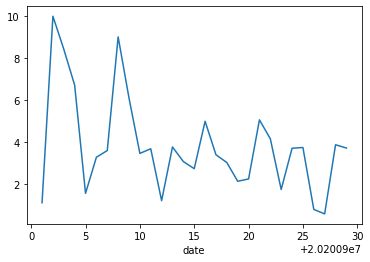

In [129]:
data.plot()

In [130]:
data = data.reset_index()
data

,date,sentiment_score
0,20200901,1.132737
1,20200902,9.976435
2,20200903,8.414232
3,20200904,6.710577
4,20200905,1.580076
5,20200906,3.290361
6,20200907,3.607998
7,20200908,8.998715
8,20200909,6.097884
9,20200910,3.471963


# 收盘价数据加载

In [131]:
import pandas as pd
data_value = pd.read_csv('../data/dataset/value.csv',encoding='utf-8')
data_value

,date,value
0,20200930,3218.0521
1,20200929,3224.3593
2,20200928,3217.5346
3,20200927,NaN
4,20200926,NaN
5,20200925,3219.4179
6,20200924,3223.1764
7,20200923,3279.7105
8,20200922,3274.3015
9,20200921,3316.9351


In [132]:
data_value['value'] = data_value['value'].interpolate(method='nearest')
data_value

,date,value
0,20200930,3218.0521
1,20200929,3224.3593
2,20200928,3217.5346
3,20200927,3217.5346
4,20200926,3219.4179
5,20200925,3219.4179
6,20200924,3223.1764
7,20200923,3279.7105
8,20200922,3274.3015
9,20200921,3316.9351


In [133]:
data_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    29 non-null     int64  
 1   value   29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


In [134]:
data_value['date'] = data_value['date'].astype(object)

In [135]:
data_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    29 non-null     object 
 1   value   29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


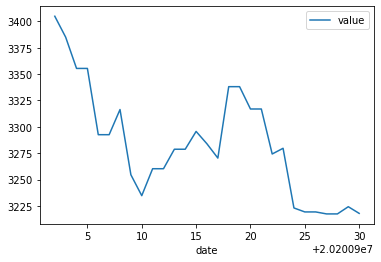

In [136]:
data_value.plot(x='date',y='value')

In [137]:
data_value = data_value[::-1]

In [138]:
data.to_csv('../data/dataset/sentimet_data.csv',encoding='utf-8',index=False)

In [139]:
data_value.to_csv('../data/dataset/value_data.csv',encoding='utf-8',index=False)

# 相关性检验

In [140]:
sentiment_data = pd.read_csv('../data/dataset/sentimet_data.csv')
value_data = pd.read_csv('../data/dataset/value_data.csv')

In [141]:
sentiment_data

,date,sentiment_score
0,20200901,1.132737
1,20200902,9.976435
2,20200903,8.414232
3,20200904,6.710577
4,20200905,1.580076
5,20200906,3.290361
6,20200907,3.607998
7,20200908,8.998715
8,20200909,6.097884
9,20200910,3.471963


In [142]:
value_data

,date,value
0,20200902,3404.8017
1,20200903,3384.9806
2,20200904,3355.3666
3,20200905,3355.3666
4,20200906,3292.5907
5,20200907,3292.5907
6,20200908,3316.4170
7,20200909,3254.6279
8,20200910,3234.8234
9,20200911,3260.3461


In [143]:
from scipy.stats import shapiro
data1 = value_data.value
stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，样本数据服从正态分布')
else:
    print('不服从正态分布')

stat=0.937, p=0.082
不能拒绝原假设，样本数据服从正态分布


In [144]:
from scipy.stats import shapiro
import numpy as np

data2 = np.log(sentiment_data.sentiment_score)
stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，样本数据服从正态分布')
else:
    print('不服从正态分布')

stat=0.948, p=0.161
不能拒绝原假设，样本数据服从正态分布


In [145]:
from scipy.stats import pearsonr
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('两变量相互独立')
else:
    print('两变量可能存在线性相关关系')

stat=0.207, p=0.280
两变量相互独立


In [146]:
from scipy.stats import spearmanr

stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('两变量相互独立')
else:
    print('两变量可能存在相关关系')

stat=0.069, p=0.721
两变量相互独立


In [147]:
cor = pd.DataFrame({'sentiment_score':sentiment_data.sentiment_score, 
       'value':value_data.value,
        })
cor.corr()

,sentiment_score,value
sentiment_score,1.000000,0.262053
value,0.262053,1.000000
